In [1]:
from random import choices, randint, randrange, random,seed
from typing import List, Optional, Callable, Tuple
import numpy as np
import pandas as pd
import sobol_seq
import matplotlib.pyplot as plt
from functools import partial
import genal as gal



In [2]:
Genome = List[int]
Population = List[Genome]
FitnessFunc = Callable[[Genome], float]
PopulateFunc = Callable[[], Population]
SelectionFunc = Callable[[Population, FitnessFunc], Tuple[Genome, Genome]]
CrossoverFunc = Callable[[Genome, Genome], Tuple[Genome, Genome]]
MutationFunc = Callable[[Genome], Genome]
PrinterFunc = Callable[[Population, int, FitnessFunc], None]

Problem 1 - Paper Pak Kun

In [3]:
# n_point = 100
# k_max = 300
# dim = 2
# epsilon = 10**(-5)
# p_mutation = 0.1
# num_bits = 64  # Number of bits for each number

# def objective_function(x):
#     f1 = np.exp(x[0]-x[1])-np.sin(x[0]+x[1])
#     f2 = (x[0]*x[1])**2-np.cos(x[0]+x[1])
#     f_list = [f1,f2]
#     denom = 0
#     for f in f_list:
#         denom +=np.abs(f)
#     F = 1/(1+denom)
#     return F
# boundaries = np.array([(-10,10) for _ in range (dim)])
# min_value = boundaries.min()
# max_value = boundaries.max()

Problem 1 - Paper Mastorakis

In [4]:
# n_point = 100
# k_max = 300
# dim = 2
# epsilon = 10**(-5)
# p_mutation = 0.1
# num_bits = 64  # Number of bits for each number

# def objective_function(x):
#     f1 = (x[0]**2+x[0]*x[1]-6)
#     f2 = (x[0]**2+x[1]**3+2*x[0]*x[1]**2-3)
#     f_list = [f1,f2]
#     denom = 0
#     for f in f_list:
#         denom +=np.abs(f)
#     F = 1/(1+denom)
#     return F
# boundaries = np.array([(-10,10) for _ in range (dim)])

# min_value = boundaries.min()
# max_value = boundaries.max()


In [5]:
# import genal as gal

# iter_points = gal.generate_points(dim,n_point,boundaries[:,0],boundaries[:,1])

# population,generation = gal.run_evolution(
#     populate_func=partial(
#         gal.generate_population,set_of_points = iter_points,num_bits=num_bits,min_value=min_value,max_value=max_value
#     ),
#     fitness_func= partial(
#         gal.fitness_function,objective_function=objective_function, num_bits=num_bits,min_value=min_value,max_value=max_value
#     ),
#     minimize=False,
#     sort_func=partial(
#         gal.sort_population,fitness_func=partial(
#             gal.fitness_function,
#             objective_function=objective_function,
#             num_bits=num_bits,
#             min_value=min_value,max_value=max_value   
#         )),
#     selection_func=partial(
#         gal.selection_pair,
#         population_fitness_func=gal.population_fitness,
#         fitness_func=partial(
#             gal.fitness_function,
#             objective_function=objective_function,
#             num_bits=num_bits,
#             min_value=min_value,max_value=max_value)),
#     mutation_func=partial(
#         gal.mutation,probability=p_mutation
#     ),
#     fitness_limit=epsilon,
#     generation_limit=k_max,
#     printer=partial(gal.print_stats,fitness_func=partial(
#         gal.fitness_function,objective_function=objective_function,max_value=max_value,min_value=min_value,num_bits=num_bits
#         ),decode_list_func=partial(
#             gal.decode_list,min_value=min_value,max_value=max_value,num_bits=num_bits)
#         )
# )

In [6]:
# gal.decode_list(population[0],min_value=min_value,max_value=max_value,num_bits=num_bits)

In [7]:
# seed(0)
m_cluster = 50
gamma = 0.2
epsilon = 10**(-3)
delta = 0.01
k_cluster = 10
n_point = 100
k_max = 300
dim = 2
epsilon = 10**(-5)
p_mutation = 0.1
num_bits = 64  # Number of bits for each number

def objective_function(x):
    f1 = np.exp(x[0]-x[1])-np.sin(x[0]+x[1])
    f2 = (x[0]*x[1])**2-np.cos(x[0]+x[1])
    f_list = [f1,f2]
    denom = 0
    for f in f_list:
        denom +=np.abs(f)
    F = 1/(1+denom)
    return F
boundaries = np.array([(-10,10) for _ in range (dim)])
min_value = boundaries.min()
max_value = boundaries.max()

In [8]:
k=0
iter_points = {}
iter_points[k] = gal.generate_points(dim,m_cluster,boundaries[:,0],boundaries[:,1])
iter_points

{0: array([[ 0.    ,  0.    ],
        [ 5.    , -5.    ],
        [-5.    ,  5.    ],
        [-2.5   , -2.5   ],
        [ 7.5   ,  7.5   ],
        [ 2.5   , -7.5   ],
        [-7.5   ,  2.5   ],
        [-6.25  , -3.75  ],
        [ 3.75  ,  6.25  ],
        [ 8.75  , -8.75  ],
        [-1.25  ,  1.25  ],
        [-3.75  , -6.25  ],
        [ 6.25  ,  3.75  ],
        [ 1.25  , -1.25  ],
        [-8.75  ,  8.75  ],
        [-8.125 , -0.625 ],
        [ 1.875 ,  9.375 ],
        [ 6.875 , -5.625 ],
        [-3.125 ,  4.375 ],
        [-0.625 , -8.125 ],
        [ 9.375 ,  1.875 ],
        [ 4.375 , -3.125 ],
        [-5.625 ,  6.875 ],
        [-6.875 , -6.875 ],
        [ 3.125 ,  3.125 ],
        [ 8.125 , -1.875 ],
        [-1.875 ,  8.125 ],
        [-4.375 , -4.375 ],
        [ 5.625 ,  5.625 ],
        [ 0.625 , -9.375 ],
        [-9.375 ,  0.625 ],
        [-9.0625, -4.6875],
        [ 0.9375,  5.3125],
        [ 5.9375, -9.6875],
        [-4.0625,  0.3125],
        [-1.5625,

In [9]:
"""MAXIMIZE FUNCTION"""
def maximize(set_of_points):
    z = []
    z_max = 0
    F = objective_function(set_of_points.T)
    for i in range (len(set_of_points)):
        if len(set_of_points.T) == 1: # ini sifat dari numpy python dimana arraynya malah dobel klo ga diginiin
            z.append(objective_function(set_of_points.T)[0,i])
            if z[i]>z_max:
                z_max = z[i]
                idx_max = i
        else:
            z.append(objective_function(set_of_points.T)[i])
            if z[i]>z_max:
                z_max = z[i]
                idx_max = i
    x_max = set_of_points[idx_max]
    return z_max,idx_max,x_max

In [10]:
k=0
iter_points = {}
iter_points[k] = gal.generate_points(dim,m_cluster,boundaries[:,0],boundaries[:,1])
x_prime = maximize(iter_points[0])[-1]
x_prime

array([-1.25,  1.25])

In [11]:
min_boundaries = 10**100
for i in range (len(boundaries)):
    abs_disc = np.abs(boundaries[i,1]-boundaries[i,0])
    if abs_disc<=min_boundaries:
        min_boundaries = abs_disc
radius = min_boundaries/2
radius

10.0

In [12]:
cluster_center,cluster_radius = {},{}
cluster_center[0],cluster_radius[0] = x_prime,radius
print(cluster_center,cluster_radius)

{0: array([-1.25,  1.25])} {0: 10.0}


In [13]:
"""FUNCTION CLUSTER"""
def function_cluster(y,lendict):
    min_dist_cluster = 10**100
    for ci,cc in cluster_center.items():
        dist = np.linalg.norm(cc-y)
        if dist<=min_dist_cluster:
            xc = cc
            cluster_id = ci
            min_dist_cluster = dist
    xt = (xc + y)/2
    # print(xt,xc,y)
    Fxt = objective_function(xt)
    Fxc = objective_function(xc)
    Fy = objective_function(y)
    # print(Fxt,Fxc,Fy)
    if (Fxt < Fy) & (Fxt < Fxc):
        cluster_center[lendict] = y
        cluster_radius[lendict] = np.linalg.norm(y-xt)
    elif (Fxt > Fy) & (Fxt > Fxc):
        cluster_center[lendict] = y
        cluster_radius[lendict] = np.linalg.norm(y-xt)
        function_cluster(xt,lendict+1)
    elif Fy > Fxc:
        cluster_center[cluster_id] = y

    cluster_radius[cluster_id] =  np.linalg.norm(y-xt)
    # return cluster_center,cluster_radius


In [14]:
k=0
while k<k_cluster:
    print(iter_points[k])
    potential_cluster_center = []
    F = objective_function(iter_points[k].T)
    for i in range (m_cluster):
        if len(iter_points[k].T) == 1:
            fungam = F[0][i]
        else:
            fungam = F[i]
        # exist_in_cluster_center = any(np.linalg.norm(iter_points[k][i] - ctr) < epsilon for ctr in cluster_center[k])
        # print(exist_in_cluster_center)
        if (fungam > gamma):# & (exist_in_cluster_center==False):
            potential_cluster_center.append(iter_points[k][i])
    # len(potential_cluster_center)
    # print('')
    for i in range (len(potential_cluster_center)):
        # print(f'Titik ke-{i}')
        lendict = len(list(cluster_center.keys()))
        function_cluster(potential_cluster_center[i],lendict)
        print(f'cluster_center ke-{k}: {cluster_center}')
        print(f'cluster_radius ke-{k}: {cluster_radius}')
        print('')
    
    population = gal.generate_population(iter_points[k],min_value=min_value,max_value=max_value,num_bits=num_bits)
    population = gal.sort_population(population=population,fitness_func=partial(
            gal.fitness_function,
            objective_function=objective_function,
            num_bits=num_bits,min_value=min_value,max_value=max_value),
            minimize=False)
    # gal.print_stats(population=population,
    #                 generation_id=k,
    #                 fitness_func=partial(
    #                     gal.fitness_function,
    #                     objective_function=objective_function,
    #                     max_value=max_value,
    #                     min_value=min_value,
    #                     num_bits=num_bits),
    #                 decode_list_func=partial(
    #                     gal.decode_list,
    #                     min_value=min_value,
    #                     max_value=max_value,
    #                     num_bits=num_bits)
    #                 )
    cutoff_criteria = 1-gal.fitness_function(population[0],objective_function=objective_function,num_bits=num_bits,max_value=max_value,min_value=min_value)
    if cutoff_criteria < epsilon:
        break
    next_generation = population[0:2]
    for j in range(int(len(population) / 2) - 1):
        parents = gal.selection_pair(population,minimize=False,
                                     population_fitness_func=gal.population_fitness,
                                     fitness_func=partial(
                                        gal.fitness_function,
                                        objective_function=objective_function,
                                        num_bits=num_bits,
                                        min_value=min_value,max_value=max_value))
        # print(f"j={j}")
        # print(decode_list(parents[0],min_value=min_value,max_value=max_value,num_bits=64),decode_list(parents[1],min_value=min_value,max_value=max_value,num_bits=64))
        offspring_a, offspring_b = gal.single_point_crossover(parents[0], parents[1])
        offspring_a = gal.mutation(offspring_a,probability= 0.1)
        offspring_b = gal.mutation(offspring_b,probability= 0.1)
        next_generation += [offspring_a, offspring_b]
    population = next_generation
    iter_points[k+1] = []
    for i in range (len(population)):
        iter_points[k+1].append(gal.decode_list(population[i],min_value=min_value,max_value=max_value,num_bits=num_bits))
    # iter_points[k+1]=spo.update_point(iter_points[k],Sn,dim=len(boundaries),objective_function=objective_function)
    iter_points[k+1] = np.array(iter_points[k+1])
    k+=1
cluster_center,cluster_radius

[[ 0.      0.    ]
 [ 5.     -5.    ]
 [-5.      5.    ]
 [-2.5    -2.5   ]
 [ 7.5     7.5   ]
 [ 2.5    -7.5   ]
 [-7.5     2.5   ]
 [-6.25   -3.75  ]
 [ 3.75    6.25  ]
 [ 8.75   -8.75  ]
 [-1.25    1.25  ]
 [-3.75   -6.25  ]
 [ 6.25    3.75  ]
 [ 1.25   -1.25  ]
 [-8.75    8.75  ]
 [-8.125  -0.625 ]
 [ 1.875   9.375 ]
 [ 6.875  -5.625 ]
 [-3.125   4.375 ]
 [-0.625  -8.125 ]
 [ 9.375   1.875 ]
 [ 4.375  -3.125 ]
 [-5.625   6.875 ]
 [-6.875  -6.875 ]
 [ 3.125   3.125 ]
 [ 8.125  -1.875 ]
 [-1.875   8.125 ]
 [-4.375  -4.375 ]
 [ 5.625   5.625 ]
 [ 0.625  -9.375 ]
 [-9.375   0.625 ]
 [-9.0625 -4.6875]
 [ 0.9375  5.3125]
 [ 5.9375 -9.6875]
 [-4.0625  0.3125]
 [-1.5625 -7.1875]
 [ 8.4375  2.8125]
 [ 3.4375 -2.1875]
 [-6.5625  7.8125]
 [-5.3125 -8.4375]
 [ 4.6875  1.5625]
 [ 9.6875 -3.4375]
 [-0.3125  6.5625]
 [-2.8125 -0.9375]
 [ 7.1875  9.0625]
 [ 2.1875 -5.9375]
 [-7.8125  4.0625]
 [-8.4375 -5.3125]
 [ 1.5625  4.6875]
 [ 6.5625 -0.3125]]
cluster_center ke-0: {0: array([-1.25,  1.25]), 1

({0: array([-1.24999523,  1.25      ]),
  1: array([0.3125, 1.25  ]),
  2: array([-4.0625,  0.3125]),
  3: array([-0.3125,  6.5625]),
  4: array([-1.25,  0.  ]),
  5: array([-1.25 ,  0.625]),
  6: array([1.86265225e-08, 6.25000000e-01]),
  7: array([-0.15625,  5.9375 ]),
  8: array([-0.3125,  1.25  ]),
  9: array([0.46875  , 0.5078125]),
  10: array([-9.375,  0.   ]),
  11: array([-6.71875,  0.15625]),
  12: array([-0.15625,  6.5625 ]),
  13: array([-0.3125,  6.5625]),
  14: array([0.      , 1.328125]),
  15: array([0.390625  , 0.56640625])},
 {0: 2.3818574845790863e-06,
  1: 9.313225746154785e-09,
  2: 1.7763568394002505e-15,
  3: 0.0,
  4: 2.384185791015625e-06,
  5: 0.15625000000007105,
  6: 9.313261273562622e-09,
  7: 0.32209912303488625,
  8: 7.105427357601002e-14,
  9: 0.26565315118511396,
  10: 1.3304208098380002,
  11: 1.3304208098380002,
  12: 0.078125,
  13: 1.7763568394002505e-15,
  14: 0.0390625,
  15: 0.04882812499998579})

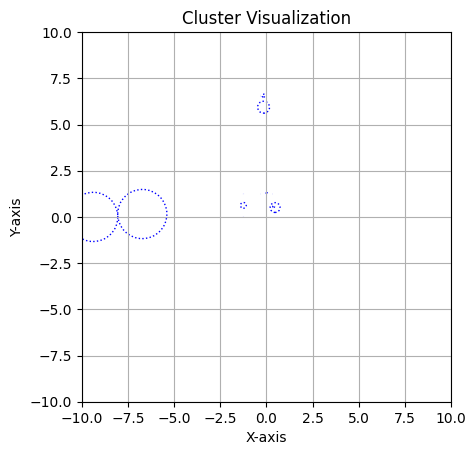

In [15]:
if dim != 2:
    print(f"Dimension {dim} can be visualized using cluster_visualization2D.")
"""Visualization"""
fig, ax = plt.subplots()
for center,radius in zip(cluster_center.values(),cluster_radius.values()):
    circle = plt.Circle(center, radius, fill=False, linestyle='dotted', edgecolor='b')
    ax.add_artist(circle)

# Set axis limits
ax.set_xlim(boundaries[0])
ax.set_ylim(boundaries[1])
# ax.autoscale_view()

# # Add labels (optional)
# for i, center in cluster_center.items():
#     ax.text(center[0], center[1], f'Cluster {i+1}', ha='center', va='bottom')

# Add a title and labels (optional)
ax.set_title('Cluster Visualization')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Show the plot
plt.gca().set_aspect('equal', adjustable='box')  # Make the aspect ratio equal
plt.grid(True)
plt.show()

In [16]:
def cluster_boundaries(center_point,radius):
    return np.array([[center_point[i]-radius,center_point[i]+radius]for i in range (len(center_point))])

In [17]:
roots = []
roots_values = []
for i in range (len(cluster_center)):
    print(f'Cluster ke-{i+1}')
    bound = cluster_boundaries(cluster_center[i],cluster_radius[i])
    min_value = bound.min()
    max_value = bound.max()
    set_of_points = gal.generate_points(dim,n_point,bound[:,0],bound[:,1])
    population,generation = gal.run_evolution(
        populate_func=partial(
            gal.generate_population,set_of_points = set_of_points,num_bits=num_bits,min_value=min_value,max_value=max_value
        ),
        fitness_func= partial(
            gal.fitness_function,objective_function=objective_function, num_bits=num_bits,min_value=min_value,max_value=max_value
        ),
        minimize=False,
        sort_func=partial(
            gal.sort_population,fitness_func=partial(
                gal.fitness_function,
                objective_function=objective_function,
                num_bits=num_bits,
                min_value=min_value,max_value=max_value   
            )),
        selection_func=partial(
            gal.selection_pair,
            population_fitness_func=gal.population_fitness,
            fitness_func=partial(
                gal.fitness_function,
                objective_function=objective_function,
                num_bits=num_bits,
                min_value=min_value,max_value=max_value)),
        mutation_func=partial(
            gal.mutation,probability=p_mutation
        ),
        fitness_limit=epsilon,
        generation_limit=k_max,
        # printer=partial(gal.print_stats,fitness_func=partial(
        #     gal.fitness_function,objective_function=objective_function,max_value=max_value,min_value=min_value,num_bits=num_bits
        #     ),decode_list_func=partial(
        #         gal.decode_list,min_value=min_value,max_value=max_value,num_bits=num_bits)
        #     )
    )
    root = gal.decode_list(population[0],min_value=min_value,max_value=max_value,num_bits=num_bits)
    value = objective_function(gal.decode_list(population[0],min_value=min_value,max_value=max_value,num_bits=num_bits))
    roots.append(root)
    roots_values.append(value)
roots,roots_values

Cluster ke-1


KeyboardInterrupt: 

In [ ]:
if dim == 1:
    list_criteria = [element for sublist in roots for element in sublist] #convert from 2D array into 1D array
else:
    list_criteria = roots
eligible_roots = np.array([x for x in list_criteria if (1-objective_function(x))<100*epsilon])
eligible_roots